In [1]:
# It is a multiclass classification problem.
# MNIST Dataset is a dataset which contains more than 70k images. Each image has low resolution.Each image is handwrittern.
# In input when we will provide the image of handwrittern digit then task of our model would be to predict the digit within the image.
# We would use ANN, where in input we will have 128 nodes and in output we will have 10 nodes.
# Why we are using 10 nodes is, in multiclass classification as much prediction we need to do as much nodes we take because, the
# output will be the node having highest probability.

# We will have 784 inputs.
# 128 nodes, in hidden layers.
# output node -> 10 nodes.

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape # It is a 3D array where we have the data of 60k images and each image is 28*28 numpy array.

(60000, 28, 28)

In [5]:
y_train # Labels: within each image, what number do we have ?

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

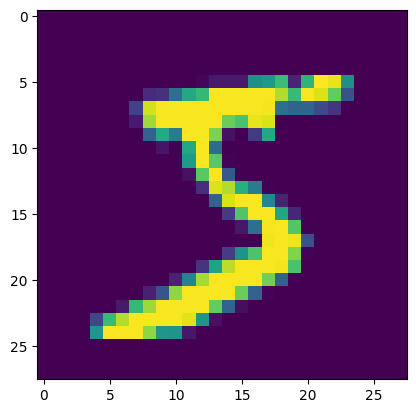

In [6]:
# We can convert above pixel value into image. In below image you can see that the image is 5 as it is shown above.
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
# Now we need to make a neural network architecture, where we will pass this data and train it.
X_train[0] # If we take any image then it contains the value between 0 to 255. So first thing which we need to do is to
# Convert this value within 0 to 1 for our numbers to be in similar range. So to do this, we will divide each value by maximum value
# which is 255.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Now we need to make our artificial neural network.
model = Sequential()
# Now we will add layers one by one.
# There is one problem and the problem is, we will get 784 inputs but our images which we have they are having 28*28 pixel architecture.
# So we need to convert them into (1,784) from (28,28). And The best way to do this is, flatten layer, which we have in keras.
# Keras have this flatten layer, which convert higher dimensional arrays into 1D.
model.add(Flatten(input_shape=(28,28))) #This will automatically convert our data into 1D.
model.add(Dense(128, activation = 'relu')) # We do not need to tell the input because automatically it will fetch from flatten.
model.add(Dense(10, activation = 'softmax')) # when we have more than one nodes in output then we will use softmax as activation function in output.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Now, we need to compile our model and then train.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam') # In loss function we could also use categorical cross
# entropy but we are using here sparse because we do not need to do one hot encoding in this case.


In [13]:
# Training.
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2817 - val_loss: 0.1537
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1255 - val_loss: 0.1151
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0862 - val_loss: 0.1070
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0641 - val_loss: 0.0906
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0504 - val_loss: 0.0864
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0382 - val_loss: 0.0856
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0313 - val_loss: 0.0884
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0247 - val_loss: 0.1074
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0197 - val_loss: 0.0921
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.017

In [15]:
y_prob = model.predict(X_test) # This will give us probability of all 10k images.

313/313 [==============================] - 0s 2ms/step


In [17]:
# But we want to show that, whether the image is 1 or 2 or 3 so here for every array, we need to calculate the
# maximum value at which index is maximum ?
y_pred = y_prob.argmax(axis = 1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9766

Here, we can see the accuracy score of 97% just like that without doing anything extra. But in machine learning after doing lot of hyper parameter tunings we could get the accuracy score of 94 or 95. Infact after sometime we will study CNN, and we will see CNN works much better on image data.

Now, the question is can we improve this.
Yes.

We can change architecture.
We can add more layers, epochs or many more.